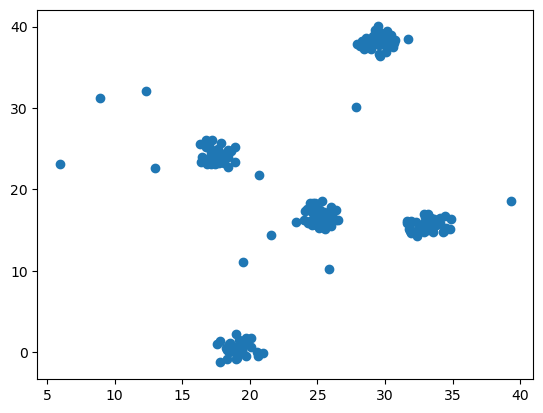

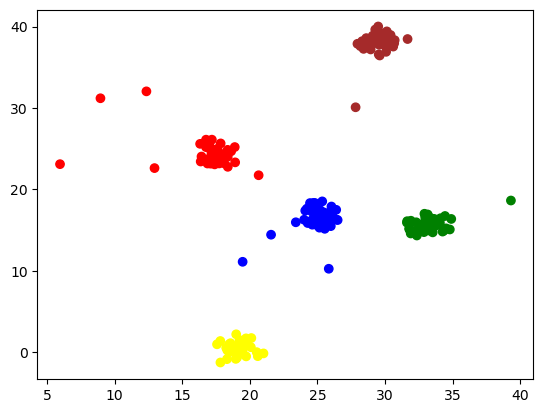

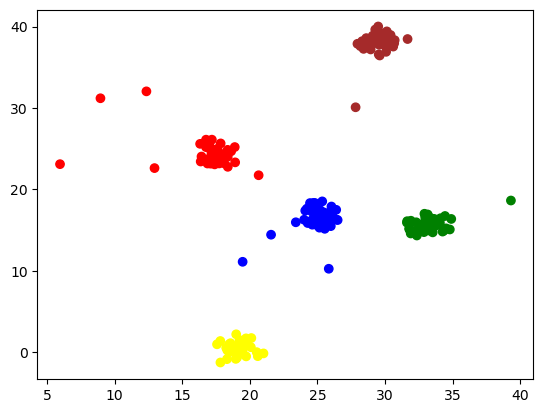

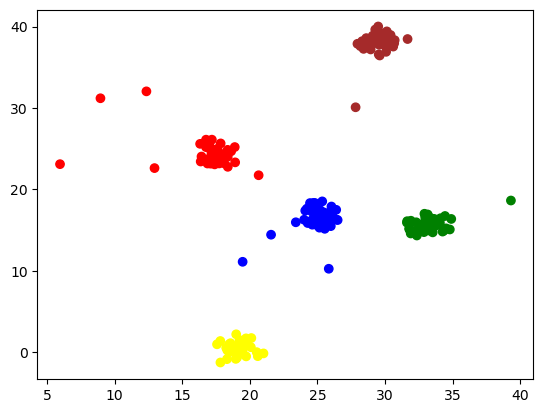

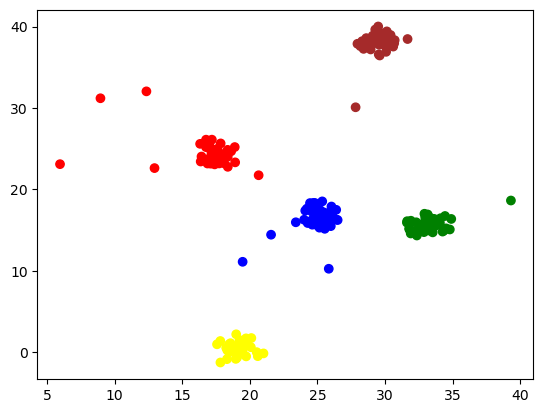

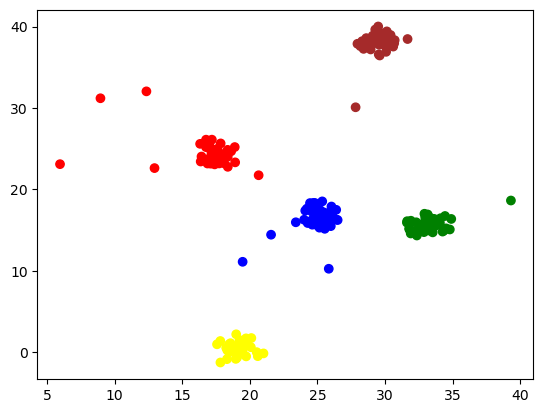

  id     RS        G       CH     D      S     DB     XB
----  -----  -------  -------  ----  -----  -----  -----
   1  0.979  743.479  2367.35  0.34  0.828  0.243  0.056
   2  0.979  743.479  2367.35  0.34  0.828  0.243  0.056
   3  0.979  743.479  2367.35  0.34  0.828  0.243  0.056
   4  0.979  743.479  2367.35  0.34  0.828  0.243  0.056
   5  0.979  743.479  2367.35  0.34  0.828  0.243  0.056


In [16]:
import wishart_lib
import indexes_lib
import generator_lib
import numpy as np
from matplotlib import pyplot as plt

generator = generator_lib.Generator()
res1 = generator.generate_with_noise()
res2 = generator.generate_with_skew()
res3 = generator.generate_with_density()

arr = np.array(res2)
xs = arr[:, 0]
ys = arr[:, 1]
plt.scatter(xs, ys)
plt.show()

tester = indexes_lib.Tester()

def compress(arr):
    was = dict()
    for i in range(len(arr)):
        if arr[i] not in was:
            was[arr[i]] = len(was)
        arr[i] = was[arr[i]]
    return arr

for r in [7, 9, 11, 15, 20]:
    wishart = wishart_lib.Wishart(r, 0.2)
    w = wishart.fit(arr)
    colour_pool = ['red', 'blue', 'green', 'yellow', 'brown', 'purple', 'orange']

    w = compress(w)
    colours = [colour_pool[i] for i in w]

    cc = []
    xc = []
    yc = []
    for i in range(len(colours)):
        if colours[i] == 0:
            continue
        cc.append(colours[i])
        xc.append(xs[i])
        yc.append(ys[i])

    plt.scatter(xs, ys, c=colours)
    plt.show()
    tester.add_test(arr, w)


tester.display()


